<a href="https://colab.research.google.com/github/SCS-Technology-and-Innovation/DDDM/blob/main/COIN/commons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is why we can't have nice things

[model](https://personal.ems.psu.edu/~dmb53/Earth_System_Models/Modeling_TOC.html)

[DOI 10.1126/science.162.3859.1243](https://dx.doi.org/10.1126/science.162.3859.1243) fulltext available through the McGill Library

In [22]:
owners = 5
milkRate = 0.4 # l per kg of grass eaten
dailyMax = 5 # kg per day per sheep
dailyMin = 1 # kg per day per sheep to survive
price = 10 # dollars per litre
maintenance = 0.5 # dollars per day per sheep
surface = 1000 # square meters of grass available at start
initial = 15 # kg per m2 of grass at the start
growthRate = 1.03 # multiple that grows each night of the grass that was left

In [23]:
limit = 100
grass = surface * initial # total kgs of grass
sheep = [1] * owners
balance = [0] * owners
step = 0

from collections import defaultdict
trackRecord = defaultdict(list)
ecology = []

while grass > 0 and step <= limit:
  totalSheep = sum(sheep)
  consumption = min(grass, totalSheep * dailyMax)
  grass -= consumption # what the sheep ate during the day
  fulfillment = consumption / totalSheep # how much did each sheep get
  print(step, consumption, grass, '' if fulfillment > dailyMin else 'hungry sheep')
  for owner in range(owners):
    cost = sheep[owner] * maintenance
    income = sheep[owner] * (fulfillment * milkRate * price)
    profit = income - cost
    balance[owner] += profit
    trackRecord[owner].append(profit)
    if (step > 0 and profit >= trackRecord[owner][-1]) and fulfillment > dailyMin: # made money, sheep are surviving
      sheep[owner] += 1 # add a sheep
  grass *= growthRate # what grows back each night
  ecology.append(grass)
  step += 1


0 25 14975 
1 25 15399.25 
2 50 15811.2275 
3 75 16210.564325000001 
4 100 16596.881254750002 
5 125 16969.787692392503 
6 150 17328.881323164278 
7 175 17673.747762859206 
8 200 18003.96019574498 
9 225 18319.07900161733 
10 250 18618.651371665852 
11 275 18902.210912815826 
12 300 19169.277240200303 
13 325 19419.355557406314 
14 350 19651.936224128505 
15 375 19866.494310852362 
16 400 20062.489140177935 
17 425 20239.363814383272 
18 450 20396.54472881477 
19 475 20533.441070679215 
20 500 20649.44430279959 
21 525 20743.92763188358 
22 550 20816.245460840088 
23 575 20865.73282466529 
24 600 20891.70480940525 
25 625 20893.45595368741 
26 650 20870.259632298035 
27 675 20821.367421266976 
28 700 20746.008443904986 
29 725 20643.388697222137 
30 750 20512.690358138803 
31 775 20353.071068882968 
32 800 20163.663200949457 
33 825 19943.57309697794 
34 850 19691.88028988728 
35 875 19407.636698583898 
36 900 19089.865799541414 
37 925 18737.561773527657 
38 950 18349.68862673349 
39 

In [24]:
if step == limit:
  print('All seemed well')
else:
  print(step, sheep, '{:.2f}'.format(sum(balance)), grass)

60 [60, 60, 60, 60, 60] 171789.22 0.0


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

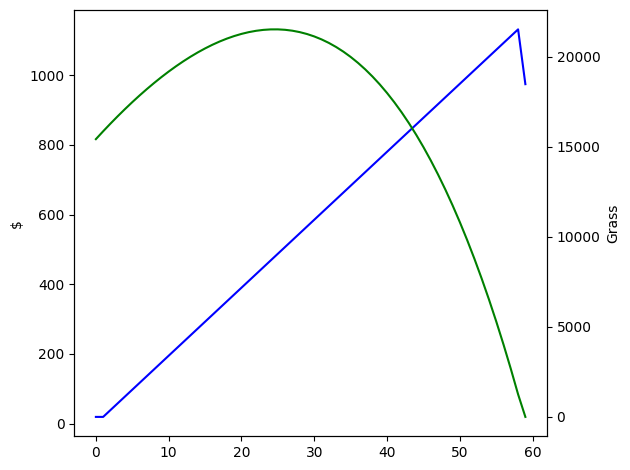

In [26]:
t = [ i for i in range(len(trackRecord[0])) ]
fig, ax1 = plt.subplots()
ax1.plot(t, trackRecord[0], color = 'blue')
ax1.set_ylabel('$')
ax2 = ax1.twinx()
ax2.plot(t, ecology, color = 'green')
ax2.set_ylabel('Grass')
fig.tight_layout()
plt.show()

In [27]:
cap = 5 # maximum of sheep per owner

limit = 100
grass = surface * initial
sheep = [1] * owners
balance = [0] * owners
step = 0

trackRecord = defaultdict(list)
ecology = []

while grass > 0 and step <= limit:
  totalSheep = sum(sheep)
  consumption = min(grass, totalSheep * dailyMax)
  grass -= consumption # what the sheep ate during the day
  fulfillment = consumption / totalSheep # how much did each sheep get
  print(step, consumption, grass, '' if fulfillment > dailyMin else 'hungry sheep')
  for owner in range(owners):
    cost = sheep[owner] * maintenance
    income = sheep[owner] * (fulfillment * milkRate * price)
    profit = income - cost
    balance[owner] += profit
    trackRecord[owner].append(profit)
    if sheep[owner] < cap and (step > 0 and profit >= trackRecord[owner][-1]) and fulfillment > dailyMin: # made money, sheep are surviving
      sheep[owner] += 1 # add a sheep
  grass *= growthRate # what grows back each night
  ecology.append(grass)
  step += 1 # upwards counter

0 25 14975 
1 25 15399.25 
2 50 15811.2275 
3 75 16210.564325000001 
4 100 16596.881254750002 
5 125 16969.787692392503 
6 125 17353.881323164278 
7 125 17749.497762859206 
8 125 18156.982695744984 
9 125 18576.692176617333 
10 125 19008.992941915854 
11 125 19454.26273017333 
12 125 19912.890612078532 
13 125 20385.277330440887 
14 125 20871.835650354114 
15 125 21372.990719864738 
16 125 21889.18044146068 
17 125 22420.855854704503 
18 125 22968.481530345638 
19 125 23532.535976256007 
20 125 24113.512055543688 
21 125 24711.91741721 
22 125 25328.2749397263 
23 125 25963.12318791809 
24 125 26617.016883555632 
25 125 27290.527390062303 
26 125 27984.243211764173 
27 125 28698.770508117097 
28 125 29434.73362336061 
29 125 30192.77563206143 
30 125 30973.558901023276 
31 125 31777.765668053977 
32 125 32606.0986380956 
33 125 33459.28159723847 
34 125 34338.060045155624 
35 125 35243.201846510296 
36 125 36175.497901905605 
37 125 37135.76283896277 
38 125 38124.835724131655 
39 125 

In [28]:
if step == limit:
  print('All seemed well')
else:
  print(step, sheep, '{:.2f}'.format(sum(balance)), grass)

101 [5, 5, 5, 5, 5] 47872.50 222911.43135761408


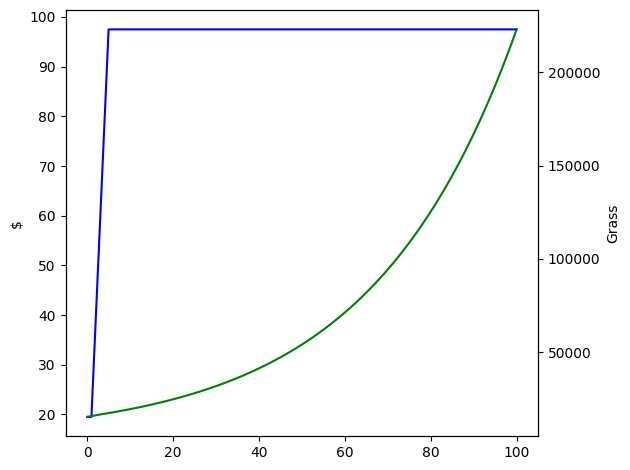

In [29]:
t = [ i for i in range(len(trackRecord[0])) ]
fig, ax1 = plt.subplots()
ax1.plot(t, trackRecord[0], color = 'blue')
ax1.set_ylabel('$')
ax2 = ax1.twinx()
ax2.plot(t, ecology, color = 'green')
ax2.set_ylabel('Grass')
fig.tight_layout()
plt.show()